# Study Grouped Catalan Elections Dataset

Load libraries:

In [63]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import logging

pp = pprint.PrettyPrinter(indent=2)

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)

Load the clean dataset:

In [64]:
df = pd.read_pickle('../../data/processed/catalan-elections-grouped-data.pkl')
# df_original = df.copy()

## Dataset Structure 

Visualize the structure of the dataset:

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273269 entries, 0 to 4273268
Data columns (total 39 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   index_autonumeric          Int64         
 1   id_eleccio                 string        
 2   nom_eleccio                string        
 3   id_nivell_territorial      string        
 4   nom_nivell_territorial     string        
 5   territori_codi             string        
 6   territori_nom              string        
 7   seccio                     int32         
 8   vots                       int32         
 9   escons                     Int64         
 10  districte                  int32         
 11  mesa                       string        
 12  type                       string        
 13  year                       int32         
 14  round                      string        
 15  party_code                 object        
 16  party_name                 object   

In [66]:
df.head()

,index_autonumeric,id_eleccio,nom_eleccio,id_nivell_territorial,nom_nivell_territorial,territori_codi,territori_nom,seccio,vots,escons,...,votants,vots_valids_percentage,cens_electoral_percentage,votants_percentage,joined_code,joined_name,joined_abbr,joined_clean_name,joined_clean_abbr,joined_color
0,117342,A19801,Eleccions al Parlament de Catalunya 1980,SE,Secció,08001,Abrera,1,2,0,...,1627.0,0.123533,0.086881,0.122926,1,Conservadors de Catalunya,C.i.C.,conservadors de catalunya,c.i.c.,#195182
1,117343,A19801,Eleccions al Parlament de Catalunya 1980,SE,Secció,08001,Abrera,1,389,0,...,1627.0,24.027177,16.898349,23.909035,4,Partit Socialista Unificat de Catalunya,PSUC,partit socialista unificat de catalunya,psuc,#9E352F
2,117344,A19801,Eleccions al Parlament de Catalunya 1980,SE,Secció,08001,Abrera,1,407,0,...,1627.0,25.138975,17.680278,25.015366,6,Partit dels Socialistes de Catalunya (PSC-PSOE),PSC,partit dels socialistes de catalunya pscpsoe,psc,#DD2809
3,117345,A19801,Eleccions al Parlament de Catalunya 1980,SE,Secció,08001,Abrera,1,7,0,...,1627.0,0.432366,0.304083,0.430240,8,Fuerza Nueva,FN,fuerza nueva,fn,#0000C4
4,117346,A19801,Eleccions al Parlament de Catalunya 1980,SE,Secció,08001,Abrera,1,81,0,...,1627.0,5.003088,3.518679,4.978488,10,Esquerra Republicana de Catalunya,ERC,esquerra republicana de catalunya,erc,#FFB232


In [67]:
len(df["party_code"].unique())

905

In [68]:
len(df["joined_code"].unique())

443

In [69]:
all(df['party_code'] == df['joined_code'])

False

First of all, we want to check that for every section in an election there aren't any repeaded ``party_codes``:

In [70]:
duplicated_party_codes = df[
    df.duplicated(subset=["mundissec", "joined_code", "nom_eleccio"], keep=False)
][["nom_eleccio", "mundissec", "party_code", "joined_code", "party_name", "vots", "vots_valids_percentage"]]

duplicated_party_codes

,nom_eleccio,mundissec,party_code,joined_code,party_name,vots,vots_valids_percentage
3766883,Eleccions Municipals 1979,08019301001,3000000,3000000,Altres partits,52,6.161137
3766884,Eleccions Municipals 1979,08019301001,3000000,3000000,Altres partits,0,0.0
3766891,Eleccions Municipals 1979,08019301001,3000000,3000000,Altres partits,0,0.0
3766898,Eleccions Municipals 1979,08019301002,3000000,3000000,Altres partits,52,8.666667
3766899,Eleccions Municipals 1979,08019301002,3000000,3000000,Altres partits,0,0.0
...,...,...,...,...,...,...,...
4251885,Eleccions Municipals 2019,08171201001,201924111,201924111,AAE OSONA,69,8.961039
4251888,Eleccions Municipals 2019,08171201002,201924111,201924111,AAE OSONA,175,20.2781
4251889,Eleccions Municipals 2019,08171201002,201924111,201924111,AAE OSONA,69,7.995365
4258938,Eleccions Municipals 2019,082461001001,201924111,201924111,AAE OSONA,132,10.099464


In [71]:
duplicated_party_codes["party_name"].unique()

array(['Altres partits', 'Independents', 'AAE OSONA'], dtype=object)

c:\Users\guill\Documents\code\catalan-elections-data\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\guill\Documents\code\catalan-elections-data\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\guill\Documents\code\catalan-elections-data\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gr

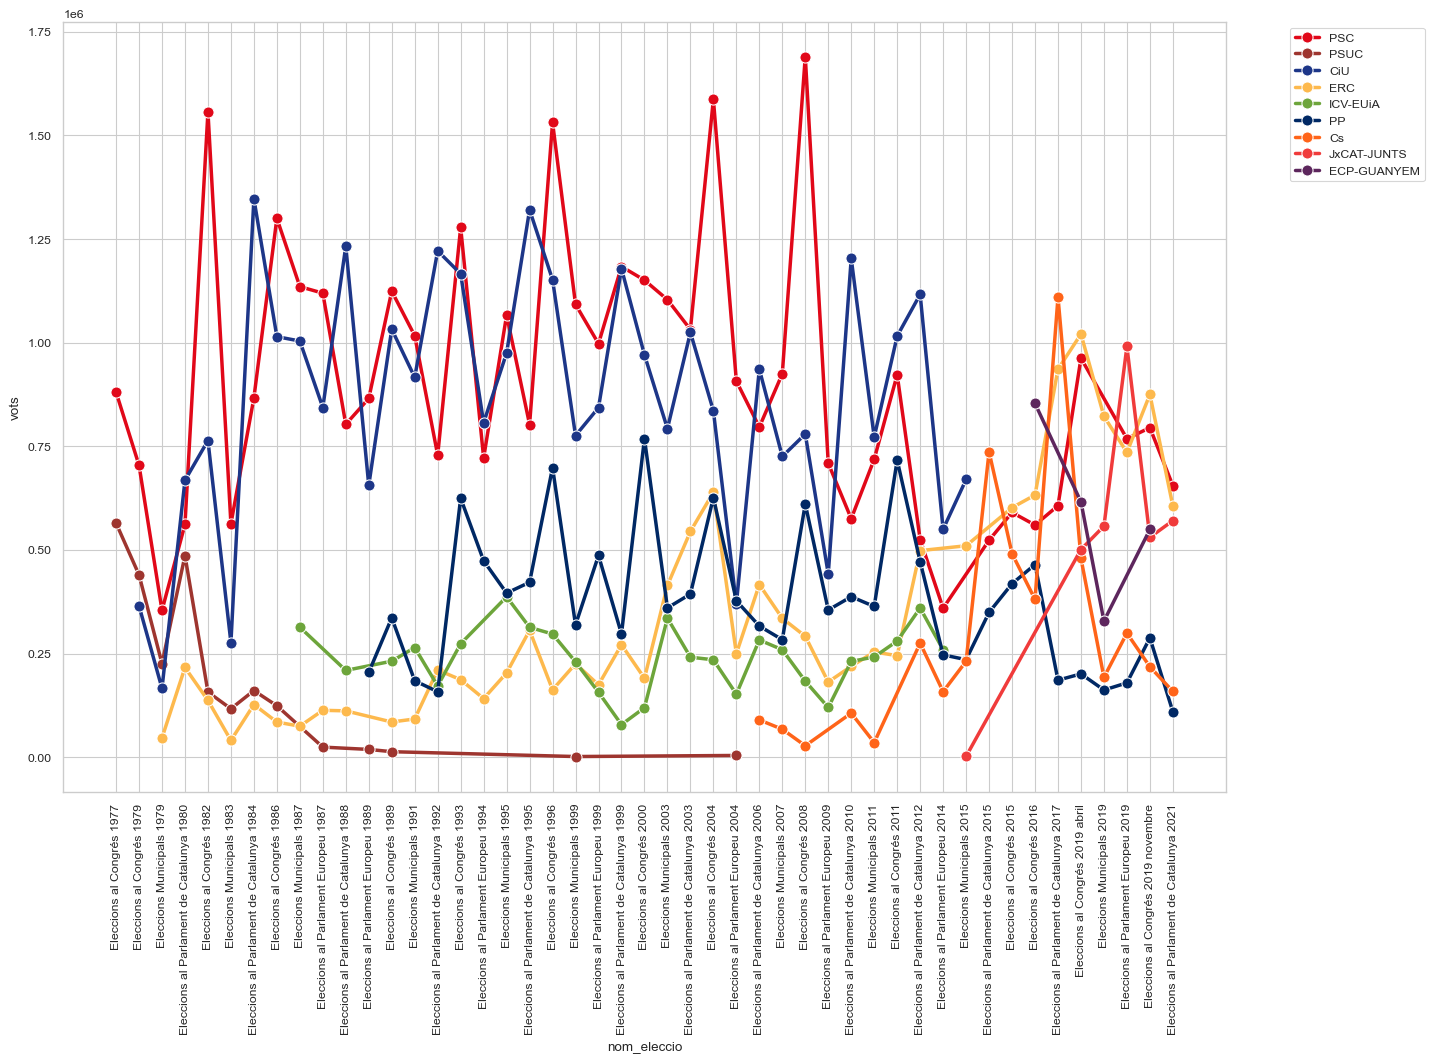

In [75]:
# Group candidatures by abbreviation and count the number of elections in which they have participated
candidatures_num_elections = df.groupby("joined_code").nom_eleccio.nunique()

# Count the total number of votes per candidature
candidatures_votes = df.groupby("joined_code").vots.sum()

# Count the total number of seats per candidature
candidatures_seats = df.groupby("joined_code").escons.sum()

# Convert Series to DataFrames
candidatures_num_elections_df = candidatures_num_elections.reset_index(
    name="num_elections"
)
candidatures_votes_df = candidatures_votes.reset_index(name="num_votes")
candidatures_seats_df = candidatures_seats.reset_index(name="num_seats")

# Merge the dataframes
candidatures_info = pd.merge(
    candidatures_num_elections_df, candidatures_votes_df, on="joined_code"
)
candidatures_info = pd.merge(candidatures_info, candidatures_seats_df, on="joined_code")

# Optionally, sort by one of the columns, for example 'num_elections'
candidatures_info = candidatures_info.sort_values(by="num_votes", ascending=False)

important_candidatures_info = candidatures_info[
    candidatures_info["num_votes"] > 2000000
]

# Filter the original dataset with the important candidatures
important_candidatures_df = df[
    df["joined_code"].isin(important_candidatures_info.joined_code)
]


def plot_candidatures_evolution(
    df: pd.DataFrame, x="nom_eleccio", y="vots", hue="joined_code"
) -> None:
    """
    Plots the temporal evolution of the number of votes for candidatures contained within the provided DataFrame.
    It creates a color palette based on candidature colors indicated in the DataFrame and uses it to color the line plot for each candidature.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the election data. It is expected to have at least 'nom_eleccio' (election name),
      'date' (election date), 'joined_code' (candidature codes), 'vots' (votes), and 'joined_color' (colors associated with each candidature) columns.

    Returns:
    - None: This function directly plots the temporal evolution of votes for candidatures and does not return any value.
    """

    # Create a mapping of joined_code to joined_abbr for the legend
    abbr_mapping = df.set_index("joined_code")["joined_abbr"].to_dict()

    # Create a color palette dictionary
    color_palette = {
        abbr_mapping[code]: color
        for code, color in zip(df["joined_code"], df["joined_color"])
    }

    # Map the 'hue' column to abbreviations for the plot
    df["hue_label"] = df["joined_code"].map(abbr_mapping)

    # Plot temporal evolution of the number of votes for the candidatures
    sns.set_style("whitegrid")
    sns.set_context("paper")

    plt.figure(figsize=(15, 10))
    sns.lineplot(
        x=x,
        y=y,
        hue="hue_label",
        data=df,
        palette=color_palette,
        markers=True,
        dashes=False,
        linewidth=2.5,
        marker="o",
        markersize=8,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=90)

    plt.show()


def plot_candidature_evolution(df: pd.DataFrame) -> None:
    """
    Aggregates votes per candidature for each election within the provided DataFrame,
    sorts the aggregated data by date, creates a color palette based on candidature colors,
    and plots the temporal evolution of votes for important candidatures.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing election data. Expected to have at least the following columns:
      'nom_eleccio' (election name), 'date' (election date), 'joined_abbr' (candidature abbreviations),
      'vots' (votes), and 'joined_color' (colors associated with each candidature).

    Returns:
    - None: This function does not return a value but directly plots the aggregated election data.
    """
    # Aggregate votes per candidature for each election
    aggregated_df = (
        df.groupby(["nom_eleccio", "date", "joined_code"])
        .agg({"vots": "sum", "joined_color": "first", "joined_abbr": "first"})
        .reset_index()
    )

    # Sort the DataFrame by 'date'
    sorted_df = aggregated_df.sort_values(by=["date"])

    plot_candidatures_evolution(sorted_df)


plot_candidature_evolution(important_candidatures_df)